In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [3]:
custom_data = pd.read_csv("Mall_customers.csv")
custom_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
custom_data.shape

(200, 5)

In [5]:
custom_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
custom_data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [13]:
#choosing the annual income and spending score column
X = custom_data.iloc[:,[3,4]].values

In [18]:
#Choosing the nunber of clusters 
#WCSS - Withcin Clusters Sum of Squares 
# Finding wcss value for different no of clusters
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++',random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

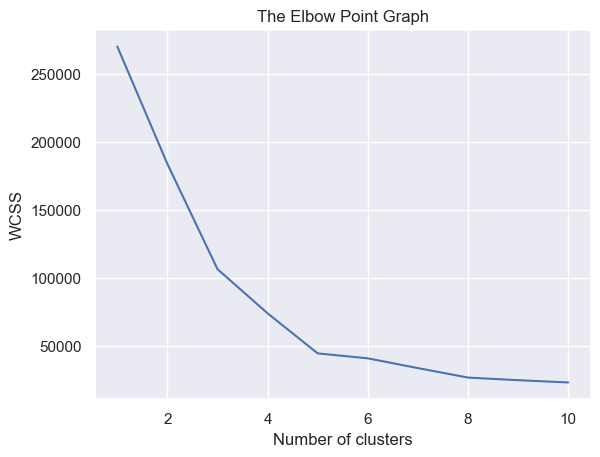

In [19]:
#plot the elobow graph
sns.set()
plt.plot(range(1,11),wcss)
plt.title("The Elbow Point Graph")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [23]:
#Optimum number of clusters  = 5, because there is no sharp drop after 5
#training the k-means clustering model, unsupervised model
kmeans = KMeans(n_clusters=5,init='k-means++',random_state=42)
#Return a label for each datapoint based on their cluster

y = kmeans.fit_predict(X)
print(y)

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


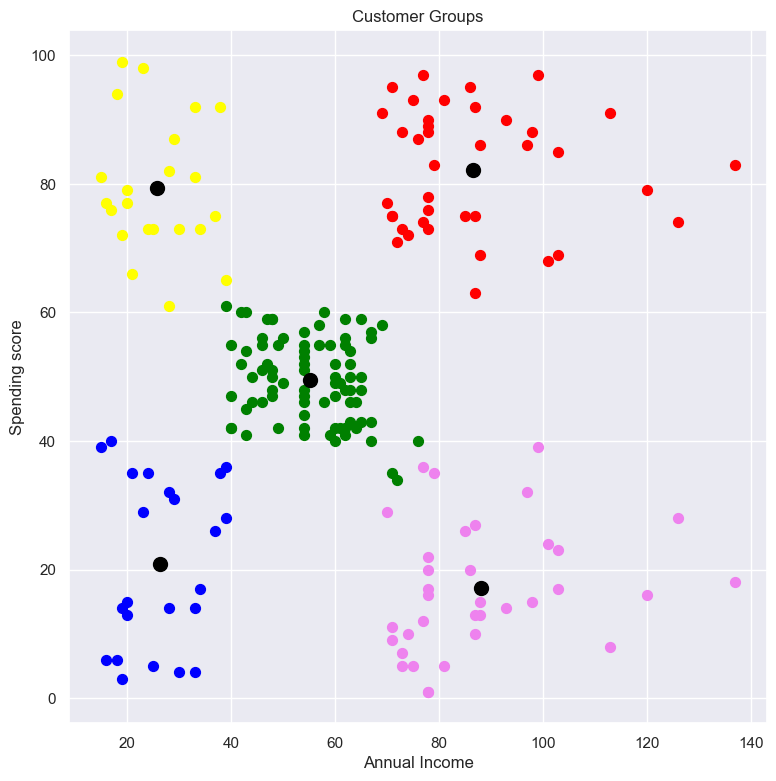

In [30]:
#visualizing all the clussters 
#plotting all the cluster and their centroids 
# 5 clusters - 0 1 2 3 4
plt.figure(figsize=(9,9))
plt.scatter(X[y==0,0],X[y==0,1],s=50,c='green',label="Cluster 1")
plt.scatter(X[y==1,0],X[y==1,1],s=50,c='red',label="Cluster 2")
plt.scatter(X[y==2,0],X[y==2,1],s=50,c='yellow',label="Cluster 3")
plt.scatter(X[y==3,0],X[y==3,1],s=50,c='violet',label="Cluster 4")
plt.scatter(X[y==4,0],X[y==4,1],s=50,c='blue',label="Cluster 5")

#plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=100,c='black',label='Centroids')
plt.title("Customer Groups")
plt.xlabel("Annual Income")
plt.ylabel("Spending score")
plt.show()